# 영화리뷰 분석
---
- IMDB 데이터 활용

In [2]:
from tensorflow.keras.datasets.imdb import load_data
import numpy as np

## [1] 데이터 준비

In [3]:
# 단어사전(voca)에서 빈도가 높은 500개까지만 사용하도록 설정
(x_train, y_train), (x_test, y_test)=load_data(num_words=500)

In [5]:
print(f'imDB 정보 \nx_train : {x_train.shape} y_train : {y_train.shape}')
print(f'x_test : {x_test.shape} y_test : {y_test.shape}')

imDB 정보 
x_train : (25000,) y_train : (25000,)
x_test : (25000,) y_test : (25000,)


In [6]:
for idx in range(3):
    print(f'[{idx} - {y_train[idx]} : {len(x_train[idx])}]\n{x_train[idx]}')
    print('----------------------------------------------')

[0 - 1 : 218]
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
----------------------------------------------
[1 - 0 : 189]
[1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 39

## [2] 학습용 데이터 변화
---
- keras에서 이미 대부분의 전처리 끝난 데이터
- 길이 조정 => 패딩(Padding)

### [2-1] 데이터별 길이 결정

In [10]:
from tensorflow.keras.utils import pad_sequences

In [15]:
# (1) 전체 리뷰의 길이 측정
all_length=np.array([len(x) for x in x_train])

print(f'all_length : {np.mean(all_length)}, {np.median(all_length)}')

import pandas as pd

# np.unique(all_length)
np.unique(all_length, return_counts=True)

all_length : 238.71364, 178.0


(array([  11,   12,   13, ..., 1851, 1854, 2494]),
 array([2, 1, 2, ..., 1, 1, 1], dtype=int64))

In [16]:
import pandas as pd

In [17]:
uniqueDF=pd.DataFrame(np.unique(all_length, return_counts=True))
uniqueDF=uniqueDF.T

In [18]:
uniqueDF.sort_values(by=1, ascending=False)

,0,1
118,132,196
111,125,194
116,130,191
108,122,181
110,124,180
...,...,...
921,974,1
743,761,1
919,972,1
744,762,1


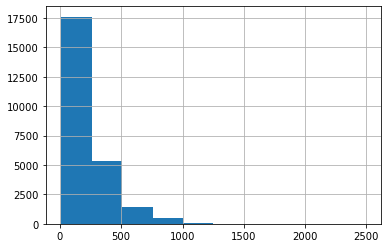

In [20]:
import matplotlib.pyplot as plt

plt.hist(all_length)
plt.grid()
plt.show()

### [2-2] 데이터별 길이 변경

In [23]:
from tensorflow.keras.utils import pad_sequences, to_categorical

train_seq = pad_sequences(x_train, maxlen=200)
train_seq.shape, train_seq[2], train_seq[2].shape, train_seq[2].size

((25000, 200),
 array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   1,  14,  47,   8,  30,  31,
          7,   4, 249, 108,   7,   4,   2,  54,  61, 369,  13,  71, 149,
         14,  22, 112,   4,   2, 311,  12,  16,   2,  33,  75,  43,   2,
        296,   4,  86, 320,  35,   2,  19, 263,   2,   2,   4,   2,  33,
         89,  78,  12,  66,  16,   4, 360,   7,   4,  58, 316, 334,  11,
          4,   2,  43,   2,   2,   8, 257,  85,   2,  42,   2,   2,  83,
         68,   2,  15,  36, 165,   2, 278,  36,  69,   2,   2,   8, 106,
         14,   2,   2,  18,   6,  22,  12, 215,  28,   2,  40,   6,  87,
        326,  23,   2,  21,  23,  22,  12, 272,  40,  57,  31,  11,   4,
         22,  47,   6,   2,  51,   9

In [24]:
test_seq = pad_sequences(x_test, maxlen=200)
test_seq

array([[  0,   0,   0, ...,  14,   6,   2],
       [  2,   2,  45, ..., 125,   4,   2],
       [  2, 189,   4, ...,   9,  57,   2],
       ...,
       [  0,   0,   0, ...,  21,   2,   2],
       [  0,   0,   0, ...,   2,   7, 470],
       [  0,   0,   0, ...,  34,   2,   2]])

In [28]:
## 패딩 확인
print(f'x_train[2] : {len(x_train[2])}길이 {x_train[2][:10]}')
print(f'train_seq[2] : {len(train_seq[2])}길이 {train_seq[2][:10]}')

x_train[2] : 141길이 [1, 14, 47, 8, 30, 31, 7, 4, 249, 108]
train_seq[2] : 200길이 [0 0 0 0 0 0 0 0 0 0]


### [2-2] 타겟 데이터 인코딩

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
train_oh=to_categorical(train_seq)
test_oh=to_categorical(test_seq)

In [31]:
train_oh.shape, train_oh[0]

((25000, 200, 500),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

### [2-3] 훈련/테스트 데이터 준비

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_val, y_train, y_val=train_test_split(train_oh,
                                               y_train, test_size=0.2, random_state=42)

In [36]:
print(f'x_train : {x_train.shape} test_seq : {test_seq.shape} x_val : {x_val.shape}')
print(f'y_train : {y_train.shape} y_test : {y_test.shape} y_val : {y_val.shape}')

x_train : (20000, 200, 500) test_seq : (25000, 200) x_val : (5000, 200, 500)
y_train : (20000,) y_test : (25000,) y_val : (5000,)


## [3] 모델
---
- 목표 : 영화리뷰 데이터 학습 후 사용자가 입력하는 리뷰가 긍정/부정 분류
- 학습 : RNN 순환신경망
- 입력 : 500
- 출력 : 1 => 분류 => 2진분류

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

### [3-1] 모델 구성
---
- 입력층 : 노드 n개 타임스템수, 피쳐수 => SimpleRNN
- 출력층 : 노드 1개 sigmoid => Dense

In [42]:
model = Sequential()
# input_shape=(타임스템프크기, 토큰크기)
model.add(SimpleRNN(9, input_shape=(200,500), return_sequences=True))
model.add(SimpleRNN(9))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 200, 9)            4590      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 9)                 171       
                                                                 
 dense_1 (Dense)             (None, 1)                 10        
                                                                 
Total params: 4,771
Trainable params: 4,771
Non-trainable params: 0
_________________________________________________________________


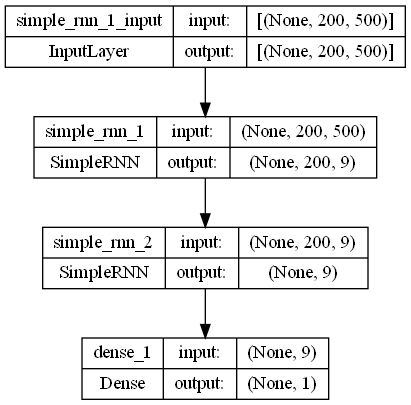

In [43]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### [3-2] 모델 생성
---
- 손실함수, 최적화방벙, 평가항목 => compile()

In [44]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics='accuracy')

## [4] 학습
---
- train 데이터와 타겟으로 학습 진행
- epoch마다 검증 진행 => validation_data, validation_split
- 학습 중 이벤트 처리 => callbacks=[]
- 학습 진행 내용 조절 => verbose
- 학습 횟수 조절 => epochs
- 배치사이즈 조절 => batch_size (기:32)

In [45]:
model.fit(x_train, y_train,
         epochs=5,
         validation_data=(x_val, y_val),
         batch_size=64)

Epoch 1/5
313/313 [==============================] - 29s 87ms/step - loss: 0.6919 - accuracy: 0.5225 - val_loss: 0.6890 - val_accuracy: 0.5290
Epoch 2/5
313/313 [==============================] - 27s 85ms/step - loss: 0.6161 - accuracy: 0.6573 - val_loss: 0.5260 - val_accuracy: 0.7396
Epoch 3/5
313/313 [==============================] - 26s 84ms/step - loss: 0.7016 - accuracy: 0.5806 - val_loss: 0.6834 - val_accuracy: 0.5684
Epoch 4/5
313/313 [==============================] - 27s 85ms/step - loss: 0.6731 - accuracy: 0.5969 - val_loss: 0.6751 - val_accuracy: 0.5774
Epoch 5/5
313/313 [==============================] - 27s 85ms/step - loss: 0.6580 - accuracy: 0.6097 - val_loss: 0.6615 - val_accuracy: 0.5906


## Embedding RNN Model
---
- One-Hot-Encodding 입력 데이터의 많은 메모리 소모에 대한 문제 해결
- 토큰을 밀집형태의 벡터로 변경 ==> Word Embedding
- Embedding Layer 적용
    * 입력 차원 - 토큰의 크기 즉 단어사전의 크기
    * 출력 차원 - 줄여서 생성하는 벡터 크기
    * 입력 층일경우 -> input_dim = 타임스템프 즉 하나의 문장을 구성하는 토큰 수

In [46]:
from tensorflow.keras.layers import Embedding

In [48]:
model2=Sequential()
# One-Hot-Encoding 500의 거대한 데이터 => 밀집형태 20크기 벡터로 변환
model2.add(Embedding(500, 20, input_length=100))
model2.add(SimpleRNN(10))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 20)           10000     
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 10,321
Trainable params: 10,321
Non-trainable params: 0
_________________________________________________________________


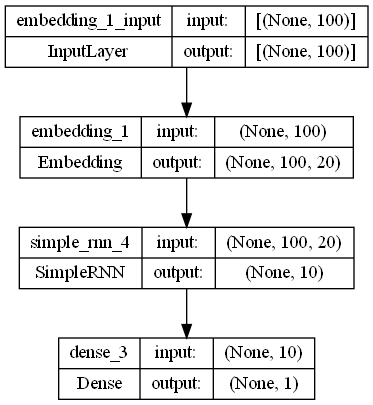

In [50]:
plot_model(model2, show_shapes=True)

# 텍스트 전처리
---
- 패키지 설치
    * NLTK : pip install nltk
    * KoNLPy : pip install Konlpy

## [1] 토큰화(Tokenization)
---
- 문장/문서를 의미를 지닌 작은 단위로 나누는 것
- 나누어진 단어를 토큰(Token)이라 함
- 종류
    * 문장 토큰화
    * 단어 토큰화

In [51]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [52]:
import nltk

In [53]:
# NLTK Corpus 말뭉치 데이터셋 다운로드 받기
# nltk.download('all', quiet=True)

In [54]:
raw_text1="when tokenizing a Unicode string.\
           NLTK tokenizers can produce token-spans.\
           when tokenizing a Unicode string."
raw_text2="This particular tokenizer requires the Punkt sentence tokenization.\
           We can also operate at the level of sentences.\
           There are numerous ways to tokenize text."

In [55]:
# 단어 단위 토큰화
result1=word_tokenize(raw_text1)

In [56]:
print(result1)

['when', 'tokenizing', 'a', 'Unicode', 'string', '.', 'NLTK', 'tokenizers', 'can', 'produce', 'token-spans', '.', 'when', 'tokenizing', 'a', 'Unicode', 'string', '.']


In [58]:
# 문장 단위 토큰화
raw_text=[raw_text1, raw_text2]

In [59]:
raw_text

['when tokenizing a Unicode string.           NLTK tokenizers can produce token-spans.           when tokenizing a Unicode string.',
 'This particular tokenizer requires the Punkt sentence tokenization.           We can also operate at the level of sentences.           There are numerous ways to tokenize text.']

In [60]:
result=sent_tokenize(raw_text1)

In [61]:
print(result, len(result))

['when tokenizing a Unicode string.', 'NLTK tokenizers can produce token-spans.', 'when tokenizing a Unicode string.'] 3


### 여러 문장에 토큰 추출
---

In [67]:
# 문장 단위로 추출
for sent in raw_text:
    total_token=[]
    # 문장 추출
    sentResult=sent_tokenize(sent)
    
    # 문장에서 추출한 토큰
    print(f'sent => {sentResult}')
    
    for ele in sentResult:
        print(f'ele => {ele}')
        wordResult=word_tokenize(ele)
        print(f'wordResult => {wordResult}')
        total_token.append(wordResult)

sent => ['when tokenizing a Unicode string.', 'NLTK tokenizers can produce token-spans.', 'when tokenizing a Unicode string.']
ele => when tokenizing a Unicode string.
wordResult => ['when', 'tokenizing', 'a', 'Unicode', 'string', '.']
ele => NLTK tokenizers can produce token-spans.
wordResult => ['NLTK', 'tokenizers', 'can', 'produce', 'token-spans', '.']
ele => when tokenizing a Unicode string.
wordResult => ['when', 'tokenizing', 'a', 'Unicode', 'string', '.']
sent => ['This particular tokenizer requires the Punkt sentence tokenization.', 'We can also operate at the level of sentences.', 'There are numerous ways to tokenize text.']
ele => This particular tokenizer requires the Punkt sentence tokenization.
wordResult => ['This', 'particular', 'tokenizer', 'requires', 'the', 'Punkt', 'sentence', 'tokenization', '.']
ele => We can also operate at the level of sentences.
wordResult => ['We', 'can', 'also', 'operate', 'at', 'the', 'level', 'of', 'sentences', '.']
ele => There are numerou

### 한글
---

In [68]:
from konlpy.tag import Okt

# 형태소 분리 객체
okt=Okt()

In [69]:
# 형태소 분리
result=okt.morphs('오늘은 월요일입니다.')
print(result)

['오늘', '은', '월요일', '입니다', '.']


In [70]:
# 형태소 분리 후 태깅(Tagging) => 품사
result2=okt.pos('오늘은 월요일입니다.')
print(result2)

[('오늘', 'Noun'), ('은', 'Josa'), ('월요일', 'Noun'), ('입니다', 'Adjective'), ('.', 'Punctuation')]


In [71]:
result2=okt.pos('오늘은 월요일입니다.', stem=True)  # stem 어간

In [72]:
print(result2)

[('오늘', 'Noun'), ('은', 'Josa'), ('월요일', 'Noun'), ('이다', 'Adjective'), ('.', 'Punctuation')]


## [2] 정제 & 정규화
---
- 불용어 제거 => 노이즈 제거
- 텍스트의 동이화
    * 대문자 또는 소문자로 통일
    * 문장의 길이

### [2-1] 불용어 (Stopword)

In [73]:
en_stopwords=nltk.corpus.stopwords.words('english')

In [74]:
len(en_stopwords)

179

In [75]:
en_stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

### [2-2] 어간 및 표제어 처리
---

In [76]:
from nltk.stem import LancasterStemmer

In [77]:
# 어간 추출
lstem=LancasterStemmer()

In [78]:
lstem.stem('working'), lstem.stem('worked'), lstem.stem('worken')

('work', 'work', 'work')

In [79]:
lstem.stem('happy'),  lstem.stem('happiness')

('happy', 'happy')

In [80]:
lstem.stem('amuse'), lstem.stem('amused')

('amus', 'amus')

In [81]:
# 표제어(사전에 등록된 단어 추출)
from nltk.stem import WordNetLemmatizer

In [82]:
wlemma=WordNetLemmatizer()

In [83]:
wlemma.lemmatize('working','v'), wlemma.lemmatize('worked','v')

('work', 'work')

In [84]:
wlemma.lemmatize('amusing','v'), wlemma.lemmatize('amused','v')

('amuse', 'amuse')

## [3] 텍스트 벡터화
---
- 텍스트 => 수치화
- 희소벡터(OHE) : BOW 방식 --> Count 기반, TF-IDF 기반
- 밀집벡터 : Embedding 방식, Word2Vect

In [86]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [87]:
corpus=[raw_text1, raw_text2]

In [88]:
ohe=CountVectorizer()

In [90]:
ohe.fit(corpus)

CountVectorizer()

In [91]:
ret=ohe.transform(corpus)

In [92]:
print(type(ret), ret, sep='\n')

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 3)	1
  (0, 5)	1
  (0, 10)	1
  (0, 15)	1
  (0, 16)	2
  (0, 22)	1
  (0, 26)	1
  (0, 27)	2
  (0, 28)	2
  (0, 31)	2
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	1
  (1, 4)	1
  (1, 6)	1
  (1, 7)	1
  (1, 8)	1
  (1, 9)	1
  (1, 11)	1
  (1, 12)	1
  (1, 13)	1
  (1, 14)	1
  (1, 17)	1
  (1, 18)	2
  (1, 19)	1
  (1, 20)	1
  (1, 21)	1
  (1, 23)	1
  (1, 24)	1
  (1, 25)	1
  (1, 29)	1
  (1, 30)	1


In [93]:
ret=ret.toarray()

In [94]:
print(ret.shape, ret, sep='\n')

(2, 32)
[[0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 2 0 0 0 0 0 1 0 0 0 1 2 2 0 0 2]
 [1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 2 1 1 1 0 1 1 1 0 0 0 1 1 0]]


In [95]:
## TF-IDF 기반
tfIdf=TfidfVectorizer()

In [96]:
tf_corpus=tfIdf.fit_transform(corpus)

In [97]:
type(tf_corpus)

scipy.sparse.csr.csr_matrix

In [99]:
tf_corpus=tf_corpus.toarray()

In [100]:
print(tf_corpus)

[[0.         0.         0.         0.15342554 0.         0.21563424
  0.         0.         0.         0.         0.21563424 0.
  0.         0.         0.         0.21563424 0.43126847 0.
  0.         0.         0.         0.         0.21563424 0.
  0.         0.         0.21563424 0.43126847 0.43126847 0.
  0.         0.43126847]
 [0.19800527 0.19800527 0.19800527 0.14088238 0.19800527 0.
  0.19800527 0.19800527 0.19800527 0.19800527 0.         0.19800527
  0.19800527 0.19800527 0.19800527 0.         0.         0.19800527
  0.39601054 0.19800527 0.19800527 0.19800527 0.         0.19800527
  0.19800527 0.19800527 0.         0.         0.         0.19800527
  0.19800527 0.        ]]


## Tokenizer 객체 생성
---

In [101]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence, Tokenizer

In [102]:
raw_text='Wiki is in Ward is original description: The simplest online database that could possibly work.\
Wiki is a piece of server software that allows users to freely create and edit Web page content using any Web browser. Wiki supports hyperlinks and has a simple text syntax for creating new pages and crosslinks between internal pages on the fly.\
Wiki is unusual among group communication mechanisms in that it allows the organization of contributions to be edited in addition to the content itself.Like many simple concepts, "open editing" has some profound and subtle effects on Wiki usage. Allowing everyday users to create and edit any page in a Web site is exciting in that it encourages democratic use of the Web and promotes content composition by nontechnical users.'

In [103]:
# 토큰으로 나누기
tokens=text_to_word_sequence(raw_text)

In [104]:
print(len(tokens), tokens)

128 ['wiki', 'is', 'in', 'ward', 'is', 'original', 'description', 'the', 'simplest', 'online', 'database', 'that', 'could', 'possibly', 'work', 'wiki', 'is', 'a', 'piece', 'of', 'server', 'software', 'that', 'allows', 'users', 'to', 'freely', 'create', 'and', 'edit', 'web', 'page', 'content', 'using', 'any', 'web', 'browser', 'wiki', 'supports', 'hyperlinks', 'and', 'has', 'a', 'simple', 'text', 'syntax', 'for', 'creating', 'new', 'pages', 'and', 'crosslinks', 'between', 'internal', 'pages', 'on', 'the', 'fly', 'wiki', 'is', 'unusual', 'among', 'group', 'communication', 'mechanisms', 'in', 'that', 'it', 'allows', 'the', 'organization', 'of', 'contributions', 'to', 'be', 'edited', 'in', 'addition', 'to', 'the', 'content', 'itself', 'like', 'many', 'simple', 'concepts', 'open', 'editing', 'has', 'some', 'profound', 'and', 'subtle', 'effects', 'on', 'wiki', 'usage', 'allowing', 'everyday', 'users', 'to', 'create', 'and', 'edit', 'any', 'page', 'in', 'a', 'web', 'site', 'is', 'exciting', '

In [105]:
myToken=Tokenizer()

In [106]:
myToken.texts_to_sequences(raw_text)

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],


In [107]:
myToken.fit_on_texts(tokens)

In [108]:
print(tokens)

['wiki', 'is', 'in', 'ward', 'is', 'original', 'description', 'the', 'simplest', 'online', 'database', 'that', 'could', 'possibly', 'work', 'wiki', 'is', 'a', 'piece', 'of', 'server', 'software', 'that', 'allows', 'users', 'to', 'freely', 'create', 'and', 'edit', 'web', 'page', 'content', 'using', 'any', 'web', 'browser', 'wiki', 'supports', 'hyperlinks', 'and', 'has', 'a', 'simple', 'text', 'syntax', 'for', 'creating', 'new', 'pages', 'and', 'crosslinks', 'between', 'internal', 'pages', 'on', 'the', 'fly', 'wiki', 'is', 'unusual', 'among', 'group', 'communication', 'mechanisms', 'in', 'that', 'it', 'allows', 'the', 'organization', 'of', 'contributions', 'to', 'be', 'edited', 'in', 'addition', 'to', 'the', 'content', 'itself', 'like', 'many', 'simple', 'concepts', 'open', 'editing', 'has', 'some', 'profound', 'and', 'subtle', 'effects', 'on', 'wiki', 'usage', 'allowing', 'everyday', 'users', 'to', 'create', 'and', 'edit', 'any', 'page', 'in', 'a', 'web', 'site', 'is', 'exciting', 'in',

In [109]:
print(myToken.word_index)   # 사전?

{'and': 1, 'wiki': 2, 'is': 3, 'in': 4, 'the': 5, 'that': 6, 'to': 7, 'web': 8, 'a': 9, 'of': 10, 'users': 11, 'content': 12, 'allows': 13, 'create': 14, 'edit': 15, 'page': 16, 'any': 17, 'has': 18, 'simple': 19, 'pages': 20, 'on': 21, 'it': 22, 'ward': 23, 'original': 24, 'description': 25, 'simplest': 26, 'online': 27, 'database': 28, 'could': 29, 'possibly': 30, 'work': 31, 'piece': 32, 'server': 33, 'software': 34, 'freely': 35, 'using': 36, 'browser': 37, 'supports': 38, 'hyperlinks': 39, 'text': 40, 'syntax': 41, 'for': 42, 'creating': 43, 'new': 44, 'crosslinks': 45, 'between': 46, 'internal': 47, 'fly': 48, 'unusual': 49, 'among': 50, 'group': 51, 'communication': 52, 'mechanisms': 53, 'organization': 54, 'contributions': 55, 'be': 56, 'edited': 57, 'addition': 58, 'itself': 59, 'like': 60, 'many': 61, 'concepts': 62, 'open': 63, 'editing': 64, 'some': 65, 'profound': 66, 'subtle': 67, 'effects': 68, 'usage': 69, 'allowing': 70, 'everyday': 71, 'site': 72, 'exciting': 73, 'enc

In [110]:
print(myToken.word_counts)

OrderedDict([('wiki', 5), ('is', 5), ('in', 5), ('ward', 1), ('original', 1), ('description', 1), ('the', 5), ('simplest', 1), ('online', 1), ('database', 1), ('that', 4), ('could', 1), ('possibly', 1), ('work', 1), ('a', 3), ('piece', 1), ('of', 3), ('server', 1), ('software', 1), ('allows', 2), ('users', 3), ('to', 4), ('freely', 1), ('create', 2), ('and', 6), ('edit', 2), ('web', 4), ('page', 2), ('content', 3), ('using', 1), ('any', 2), ('browser', 1), ('supports', 1), ('hyperlinks', 1), ('has', 2), ('simple', 2), ('text', 1), ('syntax', 1), ('for', 1), ('creating', 1), ('new', 1), ('pages', 2), ('crosslinks', 1), ('between', 1), ('internal', 1), ('on', 2), ('fly', 1), ('unusual', 1), ('among', 1), ('group', 1), ('communication', 1), ('mechanisms', 1), ('it', 2), ('organization', 1), ('contributions', 1), ('be', 1), ('edited', 1), ('addition', 1), ('itself', 1), ('like', 1), ('many', 1), ('concepts', 1), ('open', 1), ('editing', 1), ('some', 1), ('profound', 1), ('subtle', 1), ('ef

In [113]:
myToken.texts_to_sequences('and')

[[9], [], []]

In [114]:
print(tokens)

['wiki', 'is', 'in', 'ward', 'is', 'original', 'description', 'the', 'simplest', 'online', 'database', 'that', 'could', 'possibly', 'work', 'wiki', 'is', 'a', 'piece', 'of', 'server', 'software', 'that', 'allows', 'users', 'to', 'freely', 'create', 'and', 'edit', 'web', 'page', 'content', 'using', 'any', 'web', 'browser', 'wiki', 'supports', 'hyperlinks', 'and', 'has', 'a', 'simple', 'text', 'syntax', 'for', 'creating', 'new', 'pages', 'and', 'crosslinks', 'between', 'internal', 'pages', 'on', 'the', 'fly', 'wiki', 'is', 'unusual', 'among', 'group', 'communication', 'mechanisms', 'in', 'that', 'it', 'allows', 'the', 'organization', 'of', 'contributions', 'to', 'be', 'edited', 'in', 'addition', 'to', 'the', 'content', 'itself', 'like', 'many', 'simple', 'concepts', 'open', 'editing', 'has', 'some', 'profound', 'and', 'subtle', 'effects', 'on', 'wiki', 'usage', 'allowing', 'everyday', 'users', 'to', 'create', 'and', 'edit', 'any', 'page', 'in', 'a', 'web', 'site', 'is', 'exciting', 'in',

### Tokenizer 객체 -------------------------------------
- 제공한 문서/문장에 대한 단어사전(voca)
- 단어사전(voca)에 존재하지 않는 단어 => Out Of Voca: oov

In [144]:
sentences = [
    'I love my dog',
    'I love my cat',  
    'You love my dog!',
    'Do you think my dog is amazing?'
]

In [145]:
tokenizer=Tokenizer(oov_token=1)

# 단어 빈도수가 높은 순으로 낮은 정수 인덱스 부여
tokenizer.fit_on_texts(sentences)

In [146]:
# 단어 인덱스 : 단어 인덱스
print(tokenizer.word_index)

{1: 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}


In [147]:
# 단어 출력 개수
print(tokenizer.word_counts)

OrderedDict([('i', 2), ('love', 3), ('my', 4), ('dog', 3), ('cat', 1), ('you', 2), ('do', 1), ('think', 1), ('is', 1), ('amazing', 1)])


In [148]:
# 문장을 생성된 사전(voca)를 기반으로 수치화
print(tokenizer.texts_to_sequences(['We think my dog in amazing?']))

[[1, 9, 2, 4, 1, 11]]


### 패딩(Padding)
---
- 길이가 모두 다른 문장들을 동일 길이로 맞추기 위한 과정
- 길이 기준 설정
- 긴 경우 => 앞/뒤 중 선택
- 짧은 경우 => 앞/뒤 중 선택
- 값 => 패딩에 들어갈 값

In [149]:
from tensorflow.keras.utils import pad_sequences

In [150]:
result=tokenizer.texts_to_sequences(sentences)

In [151]:
result

[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]

In [152]:
encoding=pad_sequences(result)
encoding

array([[ 0,  0,  0,  5,  3,  2,  4],
       [ 0,  0,  0,  5,  3,  2,  7],
       [ 0,  0,  0,  6,  3,  2,  4],
       [ 8,  6,  9,  2,  4, 10, 11]])

### One-Hot-Encoding 변환
---
- sklearn OneHotEncoder 객체 생성
- keras to_categorical 함수

In [153]:
from tensorflow.keras.utils import to_categorical

In [154]:
# 문장을 생성된 사전(voca)를 기반으로 수치화
seq_voca=tokenizer.texts_to_sequences(sentences)
print(f'seq_voca : {len(seq_voca)}')
print(seq_voca)

seq_voca : 4
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]


In [155]:
to_categorical(seq_voca[1])

array([[0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [156]:
tokenizer.texts_to_matrix(sentences)

array([[0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.]])

In [157]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [159]:
encoded=tokenizer.texts_to_sequences(sentences)
print(encoded)

[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]


In [160]:
padded=pad_sequences(encoded)
padded

array([[ 0,  0,  0,  5,  3,  2,  4],
       [ 0,  0,  0,  5,  3,  2,  7],
       [ 0,  0,  0,  6,  3,  2,  4],
       [ 8,  6,  9,  2,  4, 10, 11]])

In [161]:
padded=pad_sequences(encoded, padding='post')
padded

array([[ 5,  3,  2,  4,  0,  0,  0],
       [ 5,  3,  2,  7,  0,  0,  0],
       [ 6,  3,  2,  4,  0,  0,  0],
       [ 8,  6,  9,  2,  4, 10, 11]])

In [166]:
padded=pad_sequences(encoded, padding='post', maxlen=5)
padded

array([[ 5,  3,  2,  4,  0],
       [ 5,  3,  2,  7,  0],
       [ 6,  3,  2,  4,  0],
       [ 9,  2,  4, 10, 11]])

## 실습 -----------------------
---
- 단위 단어 토큰화
- 불요어 제거

In [167]:
# 불용어 추출
from nltk import corpus
from nltk.tokenize import sent_tokenize, word_tokenize

In [168]:
en_stopwords=corpus.stopwords.words('english')

In [169]:
texts='Wiki is in Ward is original description: The simplest online database that could possibly work.\
Wiki is a piece of server software that allows users to freely create and edit Web page content using any Web browser. Wiki supports hyperlinks and has a simple text syntax for creating new pages and crosslinks between internal pages on the fly.\
Wiki is unusual among group communication mechanisms in that it allows the organization of contributions to be edited in addition to the content itself.Like many simple concepts, "open editing" has some profound and subtle effects on Wiki usage. Allowing everyday users to create and edit any page in a Web site is exciting in that it encourages democratic use of the Web and promotes content composition by nontechnical users.'

In [170]:
wordTokens=word_tokenize(texts)

In [172]:
len(wordTokens), type(wordTokens)

(132, list)

In [174]:
# 불용어 제거
wordTokens2=[]
for word in wordTokens:
    if word not in en_stopwords:
        wordTokens2.append(word)
        
print(f'wordTokens2 : {len(wordTokens2)}')

wordTokens2 : 85


In [177]:
wordTokens3=[ len(word) for word in wordTokens if word not in en_stopwords ]

print(f'wordTokens3 : {len(wordTokens3)}')

wordTokens3 : 85


## FILE 읽고 벡터화
---

## [1] 데이터 준비

In [178]:
FILE='../EXAM_NLP/DAY_NLP_0926/data/example.txt'

In [179]:
with open(FILE, mode='r') as f:
    fileData=f.read()

In [181]:
print(len(fileData), type(fileData))

1534 <class 'str'>


In [182]:
fileData

'The main Henry Ford Museum building houses some of the classrooms for the Henry Ford Academy\n\n\nHenry Ford Academy is the first charter school in the United States to be developed jointly by a global corporation, public education, and a major nonprofit cultural institution. The school is sponsored by the Ford Motor Company, Wayne County Regional Educational Service Agency and The Henry Ford Museum and admits high school students. It is located in Dearborn, Michigan on the campus of the Henry Ford museum. Enrollment is taken from a lottery in the area and totaled 467 in 2010.[1]\nFreshman meet inside the main museum building in glass walled classrooms, while older students use a converted carousel building and Pullman cars on a siding of the Greenfield Village railroad. Classes are expected to include use of the museum artifacts, a tradition of the original Village Schools. When the Museum was established in 1929, it included a school which served grades kindergarten to college/trade

In [184]:
# 문자열 => 문자열 리스트
from nltk import sent_tokenize

data_list=sent_tokenize(fileData)

In [185]:
print(f'data_list => {len(data_list)}')

data_list => 12


In [186]:
data_list

['The main Henry Ford Museum building houses some of the classrooms for the Henry Ford Academy\n\n\nHenry Ford Academy is the first charter school in the United States to be developed jointly by a global corporation, public education, and a major nonprofit cultural institution.',
 'The school is sponsored by the Ford Motor Company, Wayne County Regional Educational Service Agency and The Henry Ford Museum and admits high school students.',
 'It is located in Dearborn, Michigan on the campus of the Henry Ford museum.',
 'Enrollment is taken from a lottery in the area and totaled 467 in 2010.',
 '[1]\nFreshman meet inside the main museum building in glass walled classrooms, while older students use a converted carousel building and Pullman cars on a siding of the Greenfield Village railroad.',
 'Classes are expected to include use of the museum artifacts, a tradition of the original Village Schools.',
 'When the Museum was established in 1929, it included a school which served grades kin

## [2] 토큰화 객체 생성

In [187]:
fileToken=Tokenizer()
# raw_data용 단어사전 생성
fileToken.fit_on_texts(data_list)

In [191]:
print(f'word_index : {len(fileToken.word_index)}개\n{fileToken.word_index}')

word_index : 137개
{'the': 1, 'in': 2, 'ford': 3, 'of': 4, 'henry': 5, 'school': 6, 'a': 7, 'and': 8, 'museum': 9, 'for': 10, 'is': 11, 'building': 12, 'academy': 13, 'to': 14, 'educational': 15, 'main': 16, 'classrooms': 17, 'charter': 18, 'by': 19, 'high': 20, 'students': 21, 'it': 22, 'on': 23, 'use': 24, 'village': 25, 'include': 26, 'original': 27, 'schools': 28, 'design': 29, 'international': 30, 'award': 31, 'facilities': 32, 'houses': 33, 'some': 34, 'first': 35, 'united': 36, 'states': 37, 'be': 38, 'developed': 39, 'jointly': 40, 'global': 41, 'corporation': 42, 'public': 43, 'education': 44, 'major': 45, 'nonprofit': 46, 'cultural': 47, 'institution': 48, 'sponsored': 49, 'motor': 50, 'company': 51, 'wayne': 52, 'county': 53, 'regional': 54, 'service': 55, 'agency': 56, 'admits': 57, 'located': 58, 'dearborn': 59, 'michigan': 60, 'campus': 61, 'enrollment': 62, 'taken': 63, 'from': 64, 'lottery': 65, 'area': 66, 'totaled': 67, '467': 68, '2010': 69, '1': 70, 'freshman': 71, '

## [3] 문장 수치화 & 벡터화

In [192]:
seqData=fileToken.texts_to_sequences(data_list)

In [193]:
print(seqData[0])

[1, 16, 5, 3, 9, 12, 33, 34, 4, 1, 17, 10, 1, 5, 3, 13, 5, 3, 13, 11, 1, 35, 18, 6, 2, 1, 36, 37, 14, 38, 39, 40, 19, 7, 41, 42, 43, 44, 8, 7, 45, 46, 47, 48]


In [194]:
print(data_list[0])

The main Henry Ford Museum building houses some of the classrooms for the Henry Ford Academy


Henry Ford Academy is the first charter school in the United States to be developed jointly by a global corporation, public education, and a major nonprofit cultural institution.


# 감성분석 - 영화리뷰 분석
---
- IMDB 데이터 활용

In [195]:
from tensorflow.keras.datasets.imdb import load_data
import numpy as np

## [1] 데이터 준비

In [196]:
# 단어사전(voca)에서 빈도가 높은 500개 까지만 사용하도록 설정
(x_train, y_train), (x_test, y_test)=load_data(num_words=500)

In [197]:
print(f'imDB정보 \nx_train : {x_train.shape} y_train : {y_train.shape}')
print(f'x_test : {x_test.shape} y_test : {y_test.shape}')

imDB정보 
x_train : (25000,) y_train : (25000,)
x_test : (25000,) y_test : (25000,)


In [199]:
for idx in range(3):
    print(f'[{idx} - {y_train[idx]} : {len(x_train[idx])}]\n{x_train[idx]}')
    print('=========================================================')

[0 - 1 : 218]
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[1 - 0 : 189]
[1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 21

## [2] 학습용 데이터 변환
---
- keras에서 이미 대부분의 전처리 끝난 데이터
- 길이 조정 => 패딩(Padding)

### [2-1] 리뷰 데이터 길이 지정

In [200]:
# (1) 전체 리뷰의 길이 측정
all_length=np.array([ len(x) for x in x_train])

print(f'all_length : {np.mean(all_length)}, {np.median(all_length)}')

all_length : 238.71364, 178.0


In [201]:
import pandas as pd

uniqueDF=pd.DataFrame(np.unique(all_length, return_counts=True))
uniqueDF=uniqueDF.T

In [202]:
uniqueDF.sort_values(by=1, ascending=False)

,0,1
118,132,196
111,125,194
116,130,191
108,122,181
110,124,180
...,...,...
921,974,1
743,761,1
919,972,1
744,762,1


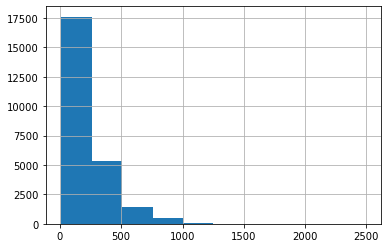

In [205]:
import matplotlib.pyplot as plt

plt.hist(all_length)
plt.grid()
plt.show()

In [206]:
# [2-2] 데이터별 길이 변경
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq=pad_sequences(x_train, maxlen=100)
train_seq.shape, train_seq[2], train_seq[2].shape, train_seq[2].size

((25000, 100),
 array([  2,   4,   2,  33,  89,  78,  12,  66,  16,   4, 360,   7,   4,
         58, 316, 334,  11,   4,   2,  43,   2,   2,   8, 257,  85,   2,
         42,   2,   2,  83,  68,   2,  15,  36, 165,   2, 278,  36,  69,
          2,   2,   8, 106,  14,   2,   2,  18,   6,  22,  12, 215,  28,
          2,  40,   6,  87, 326,  23,   2,  21,  23,  22,  12, 272,  40,
         57,  31,  11,   4,  22,  47,   6,   2,  51,   9, 170,  23,   2,
        116,   2,   2,  13, 191,  79,   2,  89,   2,  14,   9,   8, 106,
          2,   2,  35,   2,   6, 227,   7, 129, 113]),
 (100,),
 100)

In [207]:
test_seq=pad_sequences(x_test, maxlen=100)
test_seq.shape

(25000, 100)

In [208]:
## 패딩 확인
print(f'x_train[0] : {len(x_train[2])}길이 {x_train[2][:10]}')
print(f'train_seq[0] : {len(train_seq[2])}길이 {train_seq[2][:10]}')

x_train[0] : 141길이 [1, 14, 47, 8, 30, 31, 7, 4, 249, 108]
train_seq[0] : 100길이 [ 2  4  2 33 89 78 12 66 16  4]


## [2-2] 타겟 데이터 인코딩

In [209]:
from tensorflow.keras.utils import to_categorical

In [212]:
train_oh=to_categorical(train_seq)
test_oh=to_categorical(test_seq)

In [213]:
train_oh.shape, train_oh[0], test_oh.shape, test_oh[0], y_train.shape

((25000, 100, 500),
 array([[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 (25000, 100, 500),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]], dtype=float32),
 (25000,))

### [2-3] 훈련/테스트 데이터 준비

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
x_train, x_val, y_train, y_val=train_test_split(train_oh, 
                                               y_train, test_size=0.2, random_state=42)

In [217]:
print(f'x_train : {x_train.shape}\ntest_seq : {test_seq.shape}\nx_val : {x_val.shape}')
print(f'y_train : {y_train.shape}\ny_test : {y_test.shape}\ny_val : {y_val.shape}')

x_train : (20000, 100, 500)
test_seq : (25000, 100)
x_val : (5000, 100, 500)
y_train : (20000,)
y_test : (25000,)
y_val : (5000,)


## [3] 모델
---
- 목표 : 영화리뷰 데이터 학습 후 사용자가 입력하는 리뷰가 긍정/부정 분류
- 학습 : RNN 순환신경망
- 입력 : 500
- 출력 : 1 => 분류 => 2진분류

In [219]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

### [3-1] 모델 구성
---
- 입력층 : 노드 n개 타임스템수, 피쳐수 => SimpleRNN
- 출력층 : 노드 1개 sigmoid => Dense

In [221]:
model=Sequential()
# input_shape=(타임스템프크기, 토큰크기)
model.add(SimpleRNN(9, input_shape=(100, 500), return_sequences=True))
model.add(SimpleRNN(9))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 100, 9)            4590      
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 9)                 171       
                                                                 
 dense_4 (Dense)             (None, 1)                 10        
                                                                 
Total params: 4,771
Trainable params: 4,771
Non-trainable params: 0
_________________________________________________________________


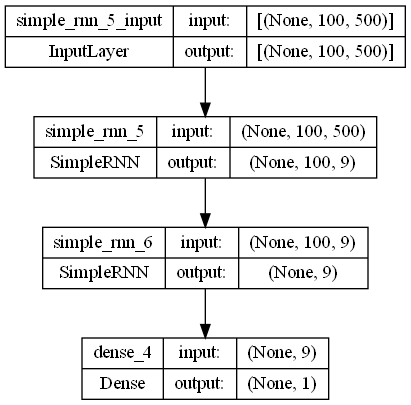

In [222]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### [3-2] 모델 생성
---
- 손실함수, 최적화방법, 평가항목 => compile()

In [223]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics='accuracy')

## [4] 학습
---
- train 데이터와 타겟으로 학습 진행
- epoch마다 검증 진행 => validation_data, validation_split
- 학습 중 이벤트 처리 => callbacks=[]
- 학습 진행 내용 조절 => verbose
- 학습 횟수 조절 => epochs
- 배치사이즈 조절 => batch_size (기:32)

In [224]:
history=model.fit(x_train, y_train, epochs=10)

Epoch 1/10
625/625 [==============================] - 18s 25ms/step - loss: 0.5764 - accuracy: 0.6893
Epoch 2/10
625/625 [==============================] - 21s 33ms/step - loss: 0.4699 - accuracy: 0.7825
Epoch 3/10
625/625 [==============================] - 15s 23ms/step - loss: 0.4467 - accuracy: 0.7959
Epoch 4/10
625/625 [==============================] - 15s 23ms/step - loss: 0.4325 - accuracy: 0.8030
Epoch 5/10
625/625 [==============================] - 20s 31ms/step - loss: 0.4228 - accuracy: 0.8080
Epoch 6/10
625/625 [==============================] - 18s 29ms/step - loss: 0.4074 - accuracy: 0.8170
Epoch 7/10
625/625 [==============================] - 17s 27ms/step - loss: 0.4006 - accuracy: 0.8216
Epoch 8/10
625/625 [==============================] - 17s 27ms/step - loss: 0.3926 - accuracy: 0.8260
Epoch 9/10
625/625 [==============================] - 17s 27ms/step - loss: 0.3859 - accuracy: 0.8304
Epoch 10/10
625/625 [==============================] - 18s 29ms/step - loss: 0.383

In [225]:
import matplotlib.pyplot as plt

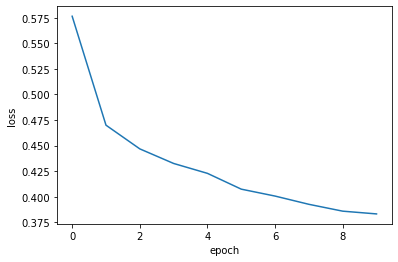

In [229]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
# plt.legend()
plt.show()

## Embedding RNN Model
---
- One-Hot-Encodding 입력 데이터의 많은 메모리 소모에 대한 문제 해결
- 토큰을 밀집형태의 벡터로 변경 ==> Word Embedding
- Embedding Layer 적용
    * 입력 차원 - 토큰의 크기 즉 단어사전의 크기
    * 출력 차원 - 줄여서 생성하는 벡터 크기
    * 입력 층일경우 -> input_dim = 타임스템프 즉 하나의 문장을 구성하는 토큰 수

In [230]:
from tensorflow.keras.layers import Embedding

In [231]:
model2=Sequential()
# One-Hot-Encoding 500의 거대한 데이터 => 밀집형태 20크기 벡터로 변환
model2.add(Embedding(500, 20, input_length=100))
model2.add(SimpleRNN(10))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 20)           10000     
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 10)                310       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 10,321
Trainable params: 10,321
Non-trainable params: 0
_________________________________________________________________


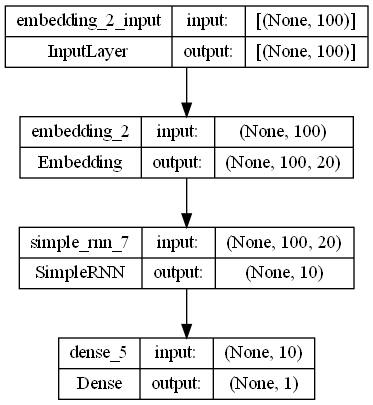

In [236]:
plot_model(model2, show_shapes=True)

In [237]:
model2.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics='accuracy')

In [239]:
history2=model2.fit(x_train, y_train, epochs=10)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\engine\input_spec.py", line 214, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_6" (type Sequential).
    
    Input 0 of layer "simple_rnn_7" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (32, 100, 500, 20)
    
    Call arguments received by layer "sequential_6" (type Sequential):
      • inputs=tf.Tensor(shape=(32, 100, 500), dtype=float32)
      • training=True
      • mask=None


In [241]:
plt.plot(history1.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'])
plt.show()

NameError: name 'history1' is not defined